# Milestone 1: Download and prepare the RedditBias data into train/test/val splits


Task 1 - Load the repo in Google Colab

In [ ]:
# Clone the repo
!git clone https://github.com/umanlp/RedditBias.git

# Installing necessary packages
!pip install --upgrade pip
!pip install numpy pandas scikit-learn

# Go inside the RedditBias Directory
%cd RedditBias

Cloning into 'RedditBias'...
remote: Enumerating objects: 1061, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 1061 (delta 0), reused 0 (delta 0), pack-reused 1058 (from 1)
Receiving objects: 100% (1061/1061), 34.70 MiB | 10.44 MiB/s, done.
Resolving deltas: 100% (699/699), done.
Updating files: 100% (169/169), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 70.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
/content/RedditBias


Task 2 - Combine annotated csv files to formulate 1 final dataset (shuffle the dataset)

In [ ]:
#add as needed
import pandas as pd

In [ ]:
files = [
    "data/gender/reddit_comments_gender_female_processed_phrase_annotated.csv",
    "data/orientation/reddit_comments_orientation_lgbtq_processed_phrase_annotated.csv",
    "data/race/reddit_comments_race_black_processed_phrase_annotated.csv",
    "data/religion1/reddit_comments_religion1_jews_processed_phrase_annotated.csv",
    "data/religion2/reddit_comments_religion2_muslims_processed_phrase_annotated.csv"
]

# Load and combine annotated data
annotated = [pd.read_csv(file, encoding="cp1252") for file in files]
df = pd.concat(annotated, ignore_index=True)

# Shuffle
df = df.sample(frac=1, random_state=1234).reset_index(drop=True)

# Drop extra columns
df = df.drop(columns=["Unnamed: 5", "id"])

# Preview
print(df.shape)
print(df.head())

(28131, 5)
   attribute_in_window                                            comment  \
0                 True  unfortunately homosexuals are mentally ill and...   
1                False  pakistanis are to hindutvas what jews are to t...   
2                 True  trust me we abhor this fucking bullshit. weve ...   
3                False  hahaha the arabs are selling out their palesti...   
4                 True                            being gay is a disease?   

                                              phrase bias_sent  bias_phrase  
0  unfortunately homosexuals are mentally ill and...       1.0          1.0  
1  pakistanis are to hindutvas what jews are to t...         1          1.0  
2  actively trying to dispell the myth that gay p...       NaN          NaN  
3  hahaha the arabs are selling out their palesti...       NaN          NaN  
4                            being gay is a disease?       NaN          NaN  


Task 3 - Data Cleaning and NLP Preprocessing

In [ ]:
# data preparation
# examine column names and types
print(df.info())
print(df.columns)

# overview
print(df.sample(5))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28131 entries, 0 to 28130
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   attribute_in_window  28131 non-null  bool   
 1   comment              28131 non-null  object 
 2   phrase               27945 non-null  object 
 3   bias_sent            11539 non-null  object 
 4   bias_phrase          11429 non-null  float64
dtypes: bool(1), float64(1), object(3)
memory usage: 906.7+ KB
None
Index(['attribute_in_window', 'comment', 'phrase', 'bias_sent', 'bias_phrase'], dtype='object')
       attribute_in_window                                            comment  \
27921                 True  right? how the hell can religious people argue...   
9215                 False  the jews are the ones who did this. it isnt th...   
22702                 True  yes because jews and muslims are oppressed lt ...   
22185                 True  stahp right there nazi. it

In [ ]:
# count of null values per column
print('null check:')
print(df.isnull().sum())
print()

# drop rows where 'bias_sent' label is null (for sentence-level task)
# can drop 'bias_phrase' for phrase-level tasks
df_clean = df.dropna(subset=['bias_sent'])

print('null check after dropping:')
print(df_clean.isnull().sum())

null check:
attribute_in_window        0
comment                    0
phrase                   186
bias_sent              16592
bias_phrase            16702
dtype: int64

null check after dropping:
attribute_in_window      0
comment                  0
phrase                  17
bias_sent                0
bias_phrase            160
dtype: int64


In [ ]:
# check for duplicates
print('duplicate sum:')
print(df.duplicated().sum)
print()

# view duplciated rows
print('duplicate rows:')
print(df[df.duplicated()])
print()

# drop duplicate rows
df_clean = df_clean.drop_duplicates()

print('duplicate sum after dropping duplicates:')
print(df_clean.duplicated().sum)

duplicate sum:
<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
28126    False
28127    False
28128    False
28129    False
28130    False
Length: 28131, dtype: bool>

duplicate rows:
       attribute_in_window                                            comment  \
2977                 False  palestinians are closer to the originally inha...   
3284                  True         do you believe the jewish people are evil?   
3721                  True  meanwhile in australia jews are being rounded ...   
5396                  True  meanwhile in australia jews are being rounded ...   
7855                  True                                   jews are greedy.   
8664                  True         do you believe the jewish people are evil?   
9099                 False  being a jew is not a race its a religion of sa...   
9493                  True                           judaism is devil worship   
9795              

In [ ]:
# Examine the final cleaned dataset state and plan next NLP preprocessing steps
print(f"Final dataset shape after cleaning: {df_clean.shape}")
print(f"Label distribution in bias_sent:")
print(df_clean['bias_sent'].value_counts())
print("\nSample of cleaned text data:")
print(df_clean['comment'].head(3).tolist())
print("\nText characteristics to address:")
print(f"Average comment length: {df_clean['comment'].str.len().mean():.1f} chars")
print(f"Comments with special chars: {df_clean['comment'].str.contains('[^a-zA-Z0-9\\s]').sum()}")
print(f"Comments with URLs: {df_clean['comment'].str.contains('http|www').sum()}")


Final dataset shape after cleaning: (11516, 5)
Label distribution in bias_sent:
bias_sent
1.0                   5492
0.0                   3888
1                     1081
0                     1011
2                       24
biased?                  8
re-state                 7
question                 2
fact?                    1
1 - context needed       1
toxic-unrelated          1
Name: count, dtype: int64

Sample of cleaned text data:
['unfortunately homosexuals are mentally ill and carry a bunch of diseases. they should not be represented in the media as much as they are.', 'pakistanis are to hindutvas what jews are to the nazis. all powerful everywhere and yet meek and powerless at the same time. this is how you can tell hindutvas are insane.', 'my mom is a nurse i asked her something very similar once and she said people dying alone']

Text characteristics to address:
Average comment length: 97.1 chars
Comments with special chars: 9232
Comments with URLs: 0


In [ ]:
# text normalization
import re

def normalize_text(text: str):
  # convert to string first if NaN or non-string
  if not isinstance(text, str):
    return ""

  # lowercase
  text = text.lower()
  # remove urls
  text = re.sub(r"http[s]?://\S+", "", text)  # identifies and removes url by identifying http(s) until space
  text = re.sub(r"www\.\S+", "", text)
  # remove mentions/user handles (might not be necessary)
  text = re.sub(r"@\w+", "", text)
  # expand simple contractions (can expand this dict as needed)
  contractions = {"can't": "cannot", "won't": "will not", "don't": "do not", "i'm": "i am"}
  for c, full in contractions.items():
      text = text.replace(c, full)
  # remove special characters (but keep basic punctuation)
  text = re.sub(r"[^a-z0-9\s.,!?'-]", "", text)
  # Remove extra whitespace
  text = re.sub(r"\s+", " ", text).strip()
  return text

# normalizes all comments into a new column comment_norm
df_clean["comment_norm"] = df_clean["comment"]

In [ ]:
#Normalizing and dropping unwanted values in df_clean

#Exploring df_clean
df_clean.head(10)

print("Values in bias_sent:")
print(df_clean["bias_sent"].unique())

print("\nValues in bias_phrase:")
print(df_clean["bias_phrase"].unique()) #did not clean as we just focused on bias_sent for now

print(f"\nNumber of unique values in bias_sent:\n{df_clean['bias_sent'].nunique(dropna = False)}\n")
print(f"Value Count: \n{df_clean['bias_sent'].value_counts(dropna = False)}")

#Dropping the "biased?", "re-state", "question", "fact?", "1 - context needed", and "toxic-unrelated" columns; make up small amount of data

unwanted_values = ["biased?", "re-state", "question", "fact?", "1 - context needed", "toxic-unrelated"]

to_drop = df_clean[df_clean['bias_sent'].isin(unwanted_values)].index
df_clean = df_clean.drop(to_drop)

print(f"\nNew Value Count: \n{df_clean['bias_sent'].value_counts(dropna=False)}")

print(f"Type: {df_clean['bias_sent'].dtype}")

#Normalizing floats and strings to int

df_clean['bias_sent'] = df_clean['bias_sent'].replace({'0':0,'1':1, '2':2, 0.0: 0, 1.0:1, 2.0:2})
df_clean['bias_sent'] = df_clean['bias_sent'].astype(int)

print(f"\nType: {df_clean['bias_sent'].dtype}")

#Dropping rows with value of 2

df_clean = df_clean[df_clean['bias_sent']!= 2]

print(f"\nNew Value Count: \n{df_clean['bias_sent'].value_counts(dropna=False)}")


Values in bias_sent:
[1.0 '1' 0.0 '0' 'question' 'fact?' 're-state' 'biased?' 2
 '1 - context needed' 'toxic-unrelated']

Values in bias_phrase:
[ 1.  0. nan  2.]

Number of unique values in bias_sent:
11

Value Count: 
bias_sent
1.0                   5492
0.0                   3888
1                     1081
0                     1011
2                       24
biased?                  8
re-state                 7
question                 2
fact?                    1
1 - context needed       1
toxic-unrelated          1
Name: count, dtype: int64

New Value Count: 
bias_sent
1.0    5492
0.0    3888
1      1081
0      1011
2        24
Name: count, dtype: int64
Type: object

Type: int64

New Value Count: 
bias_sent
1    6573
0    4899
Name: count, dtype: int64


/tmp/ipython-input-3351652260.py:28: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['bias_sent'] = df_clean['bias_sent'].replace({'0':0,'1':1, '2':2, 0.0: 0, 1.0:1, 2.0:2})


Task 4 - Implement feature engineering techniques

In [ ]:
# add feature engineering columns for features like word counts, uppercase ratio, and trigger word presence

# adding word count to each row
df_clean["word_count"] = df_clean["comment"].apply(lambda comment: len(comment.split()))

# uppercase ratio: uppercase letters / total letters
def calculate_uppercase_ratio(comment: str) -> float:
  total_count = len(comment)
  uppercase_count = sum(1 for letter in comment if letter.isupper())
  return uppercase_count / total_count

df_clean["uppercase_ratio"] = df["comment"].apply(lambda comment: calculate_uppercase_ratio(comment))

print('uppercase ratio')
print(df_clean["uppercase_ratio"].value_counts())

uppercase ratio
uppercase_ratio
0.000000    11471
0.012987        1
Name: count, dtype: int64


In [ ]:
# load trigger words
# note: a lot have asterisks to indicate a root / stem
# better to separate into positive and negative trigger files
trigger_word_files = [
  # gender trigger words
  "data/gender/gender_female.txt",
  "data/gender/gender_female_attributes.txt",
  "data/gender/gender_female_extra.txt",
  "data/gender/gender_female_old.txt",
  "data/gender/gender_female_pos.txt",
  "data/gender/gender_opposites.txt", # phrases
  # orientation trigger words
  "data/orientation/orientation_lgbtq.txt",
  "data/orientation/orientation_lgbtq_not_used_annotation.txt",
  "data/orientation/orientation_lgbtq_pos.txt",
  "data/orientation/orientation_opposites.txt", # phrases
  # race trigger words
  "data/race/black_words.txt",
  "data/race/race_black.txt",
  "data/race/race_black_pos.txt",
  "data/race/race_opposites.txt", # phrases
  # religion trigger words
  "data/religion1/religion1_jews.txt",
  "data/religion1/religion1_jews_pos.txt",
  "data/religion1/religion1_opposites.txt",
  "data/religion2/religion2_muslims.txt",
  "data/religion2/religion2_muslims_pos.txt",
  "data/religion2/religion2_opposites.txt" # phrases
]

negative_trigger_files = []
positive_trigger_files = []
phrase_opposites_files = []
# phrase_opposites files don't add much value

for path in trigger_word_files:
  filename = path.split('/')[-1]
  if re.search(r'_pos\.txt$', filename):
    positive_trigger_files.append(path)
  elif re.search(r'_opposites\.txt$', filename):
    phrase_opposites_files.append(path)
  else:
    negative_trigger_files.append(path)

def load_trigger_set(file_paths):
    trigger_set = set() # set bc its whole words where exact matches can easily be found
    stem_triggers = []
    phrase_triggers = []

    for path in file_paths:
        with open(path, 'r', encoding='utf8') as f:
            for line in f:
                line = line.strip()
                if not line or line.startswith('#'):  # skip blanks/comments
                    continue
                # handle phrase pairs: if comma, use each side
                if ',' in line:
                    parts = [p.replace('"', '').replace('*', '').lower().strip() for p in line.split(',')]
                    parts = [p for p in parts if p != ""]
                    phrase_triggers.extend(parts)
                # Handle asterisks (wildcard/stem triggers)
                elif '*' in line:
                    stem = line.replace('*', '').replace('"', '').lower().strip()
                    if stem != "":
                      stem_triggers.append(stem)
                # Else add as literal word/phrase
                else:
                    trigger = line.replace('"', '').lower().strip()
                    if trigger != "":
                      trigger_set.add(trigger)

    return trigger_set, stem_triggers, phrase_triggers

neg_trigger_set, neg_stem_triggers, neg_phrase_triggers = load_trigger_set(negative_trigger_files)

print("negative trigger set")
print(neg_trigger_set)

print("neg_stem triggers")
print(neg_stem_triggers)

print("neg_phrase_triggers")
print(neg_phrase_triggers)


pos_trigger_set, pos_stem_triggers, pos_phrase_triggers = load_trigger_set(positive_trigger_files)

print("positive trigger set")
print(pos_trigger_set)

print("pos_stem triggers")
print(neg_stem_triggers)

print("pos_phrase_triggers")
print(pos_phrase_triggers)

negative trigger set
{'natal', 'black men', 'kith', 'guilt-inducement', 'spouse', 'grief', 'war', 'polygamous', 'agony', 'devoted', 'lazy', 'violence', 'heritage', 'timid', 'slave', 'headstrong', 'pushy', 'african-americans', 'violent', 'weak', 'hoof', 'children', 'maid', 'divorce', 'show queen', 'selfish', 'dominating', 'threaten', 'frugal', 'foster', 'infancy', 'devil', 'weird', 'immoral', 'talkative', 'household', 'sexually abnormal', 'horn', 'beady eyes', 'orphan', 'sickness', 'less intelligent', 'thieves', 'hook-nose', 'horrible', 'flashy', 'slaves', 'kindred', 'deadly', 'loner', 'lust', 'maternal', 'black population', 'kinship', 'greedy', 'threat', 'engaged', 'hyper sexual', 'matrimony', 'dark-skinned people', 'wed', 'meek', 'spoiled', 'sexually repressive', 'hypersexual', 'sin', 'submissive', 'shooter', 'vielded', 'love', 'weak-minded', 'newlywed', 'shakespeare', 'mentally ill', 'strange', 'marriage', 'power-hungry', 'rich', 'theatre', 'satan', 'enemy', 'negroes', 'waitress', 'c

In [ ]:
# trigger word features

# def has_trigger(comment, trigger_set, stem_triggers, phrase_triggers):
#     for phrase in phrase_triggers:
#         if phrase.lower() in comment:
#             return True
#     for word in trigger_set:
#         if re.search(r'\b' + re.escape(word.lower()) + r'\b', comment):
#             return True
#     for stem in stem_triggers:
#         if re.search(r'\b' + re.escape(stem.lower()), comment):
#             return True
#     return False

def extract_trigger_features(comment, negative_set, positive_set, negative_stems, positive_stems, phrases_neg, phrases_pos):
    text = comment.lower()
    has_neg = any(phrase in text for phrase in phrases_neg) or \
              any(re.search(r'\b' + re.escape(w), text) for w in negative_stems) or \
              any(re.search(r'\b' + re.escape(w) + r'\b', text) for w in negative_set)

    has_pos = any(phrase in text for phrase in phrases_pos) or \
              any(re.search(r'\b' + re.escape(w), text) for w in positive_stems) or \
              any(re.search(r'\b' + re.escape(w) + r'\b', text) for w in positive_set)

    return has_neg, has_pos

df_clean[["has_neg_trigger", "has_pos_trigger"]] = df_clean["comment"].apply(
    lambda comment: extract_trigger_features(
        comment, neg_trigger_set, pos_trigger_set, neg_stem_triggers, pos_stem_triggers, neg_phrase_triggers, pos_phrase_triggers
    )
).apply(pd.Series)

print(df_clean[['comment_norm', 'has_neg_trigger', 'has_pos_trigger']].head())
print(df_clean['has_neg_trigger'].value_counts())
print(df_clean['has_pos_trigger'].value_counts())

print('has negative trigger sampling')
print(df_clean[df_clean['has_neg_trigger'] == False][['comment_norm']].head())

print('has positive trigger sampling')
print(df_clean[df_clean['has_pos_trigger'] == True][['comment_norm']].head())


                                        comment_norm  has_neg_trigger  \
0  unfortunately homosexuals are mentally ill and...             True   
1  pakistanis are to hindutvas what jews are to t...             True   
7  my mom is a nurse i asked her something very s...             True   
8  black men are universally considered ugly by e...             True   
9  my girlfriend is a master cook its also gluten...             True   

   has_pos_trigger  
0            False  
1            False  
7            False  
8             True  
9            False  
has_neg_trigger
True     11414
False       58
Name: count, dtype: int64
has_pos_trigger
False    9559
True     1913
Name: count, dtype: int64
has negative trigger sampling
                                           comment_norm
762   dot run away and cower! i was enjoying you say...
1018  edit it to make it look like a girl is holding...
1790  youre not wrong though jewish people are not s...
2096  ammunition store.com has wolf gol

In [ ]:
df_clean.head()

,attribute_in_window,comment,phrase,bias_sent,bias_phrase,comment_norm,word_count,uppercase_ratio,has_neg_trigger,has_pos_trigger
0,True,unfortunately homosexuals are mentally ill and...,unfortunately homosexuals are mentally ill and...,1,1.0,unfortunately homosexuals are mentally ill and...,24,0.0,True,False
1,False,pakistanis are to hindutvas what jews are to t...,pakistanis are to hindutvas what jews are to t...,1,1.0,pakistanis are to hindutvas what jews are to t...,31,0.0,True,False
7,True,my mom is a nurse i asked her something very s...,my mom is a nurse i asked her something,1,1.0,my mom is a nurse i asked her something very s...,18,0.0,True,False
8,True,black men are universally considered ugly by e...,black men are universally considered ugly by e...,1,1.0,black men are universally considered ugly by e...,15,0.0,True,True
9,True,my girlfriend is a master cook its also gluten...,my girlfriend is a master cook its also gluten,1,1.0,my girlfriend is a master cook its also gluten...,11,0.0,True,False


Task 5 - Split dataset into training/validation/test sets with a fixed random seed

In [ ]:
#tokenize the phrase
import numpy as np
from sklearn.model_selection import train_test_split

df_task = df_clean.copy()
df_task["text"] = df_task["phrase"].fillna(df_task["comment"]).map(normalize_text).astype(str)
df_task = df_task[["text", "bias_sent"]].dropna()

X = df_task["text"].values
y = df_task["bias_sent"].values

# Stratified split (train/val/test)
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


In [ ]:
df_task.head()

,text,bias_sent
0,unfortunately homosexuals are mentally ill and...,1
1,pakistanis are to hindutvas what jews are to t...,1
7,my mom is a nurse i asked her something,1
8,black men are universally considered ugly by e...,1
9,my girlfriend is a master cook its also gluten,1


Task 6 - Conduct exploratory data analysis to generate summary statistics and key predictive features

In [ ]:
#tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#CountVectorizer = tokenization + vocab + raw token counts as features
bow_clf = Pipeline([
    ("bow", CountVectorizer(ngram_range=(1,2), min_df=3, max_df=0.9)),
    ("clf", LogisticRegression(max_iter=1000))
])

bow_clf.fit(X_train, y_train)
print("BOW → Val report")
print(classification_report(y_val, bow_clf.predict(X_val)))


BOW → Val report
              precision    recall  f1-score   support

           0       0.70      0.67      0.68       735
           1       0.76      0.79      0.77       986

    accuracy                           0.74      1721
   macro avg       0.73      0.73      0.73      1721
weighted avg       0.74      0.74      0.74      1721



In [ ]:
#vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

#final vectorizer + model (best config)
final_clf = Pipeline([
    ("tfidf", TfidfVectorizer(
        ngram_range=(1,2),   #unigrams + bigrams
        sublinear_tf=True,   #log scaling
        min_df=3,            #drop rare tokens
        max_df=0.95          #drop overly common tokens
    )),
    ("clf", LogisticRegression(max_iter=2000, class_weight="balanced"))
])

import numpy as np
X_trval = np.concatenate([X_train, X_val])
y_trval = np.concatenate([y_train, y_val])

final_clf.fit(X_trval, y_trval)

print("Final Model → TEST report")
print(classification_report(y_test, final_clf.predict(X_test)))


Final Model → TEST report
              precision    recall  f1-score   support

           0       0.69      0.73      0.71       735
           1       0.79      0.76      0.77       986

    accuracy                           0.75      1721
   macro avg       0.74      0.74      0.74      1721
weighted avg       0.75      0.75      0.75      1721



/tmp/ipython-input-3348562858.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="bias_sent", data=df_clean, palette="coolwarm")


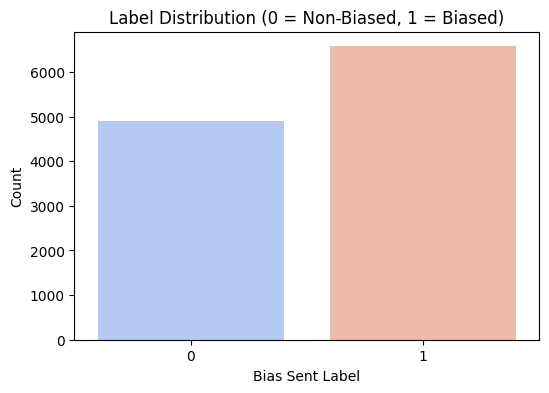

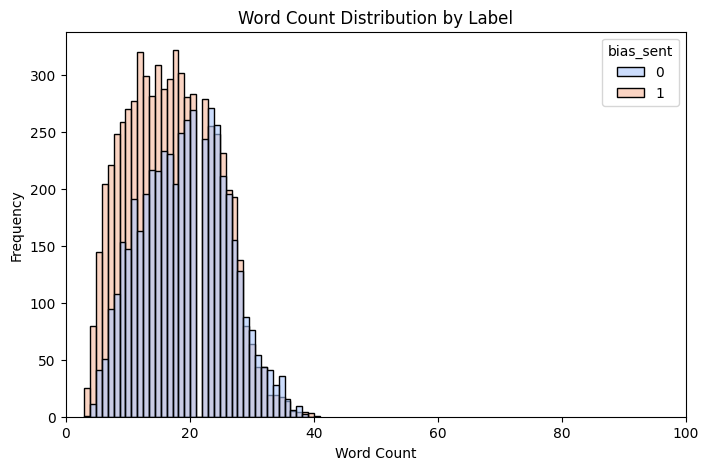

Descriptive statistics (word_count by label):
            count       mean       std  min   25%   50%   75%   max
bias_sent                                                          
0          4899.0  19.058379  6.886991  3.0  14.0  19.0  24.0  41.0
1          6573.0  16.890005  7.146407  3.0  11.0  17.0  22.0  40.0
Crosstab: Negative Trigger vs Label
bias_sent               0         1
has_neg_trigger                    
False            0.006328  0.004108
True             0.993672  0.995892

Crosstab: Positive Trigger vs Label
bias_sent               0         1
has_pos_trigger                    
False            0.827108  0.837821
True             0.172892  0.162179
Top Chi2 Features (biased): ['wife' 'mom' 'islam is' 'wife is' 'islam' 'mom is' 'my wife'
 'black people' 'my mom' 'nurse and' 'black' 'think' 'people are' 'people'
 'you' 'my' 'that' 'saying' 'is nurse' 'nurse']
Top Chi2 Features (non-biased): ['should' 'christians are' 'is definitely' 'see how' 'that shit'
 'the bomb'

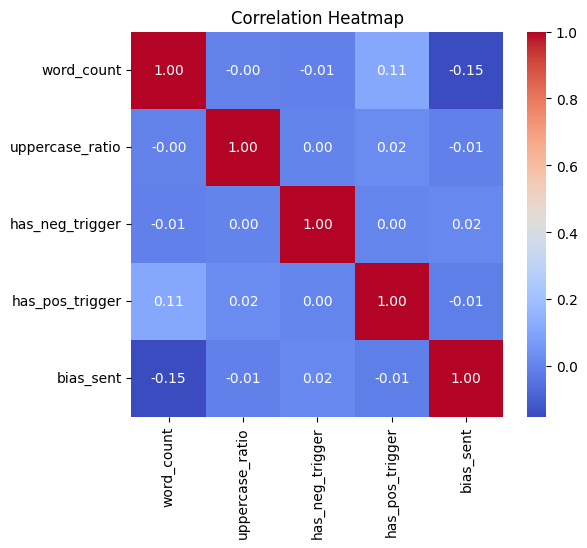

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Label distribution
plt.figure(figsize=(6,4))
sns.countplot(x="bias_sent", data=df_clean, palette="coolwarm")
plt.title("Label Distribution (0 = Non-Biased, 1 = Biased)")
plt.xlabel("Bias Sent Label")
plt.ylabel("Count")
plt.show()

# Word count distribution
plt.figure(figsize=(8,5))
sns.histplot(data=df_clean, x="word_count", hue="bias_sent", bins=40,
             kde=False, palette="coolwarm", alpha=0.6)
plt.title("Word Count Distribution by Label")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.xlim(0,100)  # adjust if you want to focus on shorter comments
plt.show()

# Descriptive stats
print("Descriptive statistics (word_count by label):")
print(df_clean.groupby("bias_sent")["word_count"].describe())

# Trigger word correlation with label
print("Crosstab: Negative Trigger vs Label")
print(pd.crosstab(df_clean["has_neg_trigger"], df_clean["bias_sent"],
                  normalize="columns"))

print("\nCrosstab: Positive Trigger vs Label")
print(pd.crosstab(df_clean["has_pos_trigger"], df_clean["bias_sent"],
                  normalize="columns"))

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import chi2

vectorizer = CountVectorizer(ngram_range=(1,2), min_df=5, max_df=0.95)
X_counts = vectorizer.fit_transform(df_task["text"])
y = df_task["bias_sent"]

chi2_scores, p_values = chi2(X_counts, y)
feature_names = np.array(vectorizer.get_feature_names_out())

# Get top features for biased and non-biased
top_biased = feature_names[np.argsort(chi2_scores)[-20:]]
top_nonbiased = feature_names[np.argsort(chi2_scores)[:20]]

print("Top Chi2 Features (biased):", top_biased)
print("Top Chi2 Features (non-biased):", top_nonbiased)

# Fit logistic regression with TF-IDF again to inspect coefficients
vectorizer = TfidfVectorizer(ngram_range=(1,2), sublinear_tf=True,
                             min_df=3, max_df=0.95)
X_tfidf = vectorizer.fit_transform(df_task["text"])
clf = LogisticRegression(max_iter=2000, class_weight="balanced")
clf.fit(X_tfidf, y)

# Extract feature importance
coef = clf.coef_[0]
top_positive_idx = np.argsort(coef)[-20:]
top_negative_idx = np.argsort(coef)[:20]

print("Top Predictive Features (Biased):")
for i in top_positive_idx:
    print(f"{vectorizer.get_feature_names_out()[i]} ({coef[i]:.3f})")

print("\nTop Predictive Features (Non-Biased):")
for i in top_negative_idx:
    print(f"{vectorizer.get_feature_names_out()[i]} ({coef[i]:.3f})")

# Numerical features
feature_cols = ["word_count", "uppercase_ratio", "has_neg_trigger", "has_pos_trigger", "bias_sent"]
corr = df_clean[feature_cols].corr()

plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Milestone 2: Finetune the base model using the RedditBias dataset


Task 1 - Base model & environment setup

In [ ]:
#switch to GPU
import torch
print("GPU available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU type:", torch.cuda.get_device_name(0))

GPU available: True
GPU type: Tesla T4


In [ ]:
#install HF tools
!pip install transformers datasets evaluate accelerate scikit-learn

In [ ]:
#use cased or uncased -> uncased is ok
import re

#check how many comments contain uppercase
has_upper = df_clean["comment"].str.contains(r"[A-Z]").sum()
total = len(df_clean)
print(f"{has_upper}/{total} comments contain uppercase ({has_upper/total:.1%})")

#show a few examples where uppercase might matter
examples = df_clean[df_clean["comment"].str.contains(r"[A-Z]")]["comment"].head(10).tolist()
for ex in examples:
    print("•", ex)

0/11472 comments contain uppercase (0.0%)


In [ ]:
#load tokenizer & model
from transformers import AutoTokenizer, AutoModelForSequenceClassification

MODEL_NAME = "bert-base-uncased"  # chosen based on casing check

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=2,
    id2label={0: "non_biased", 1: "biased"},
    label2id={"non_biased": 0, "biased": 1},
)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Task 2 - Preprocessing pipeline and data loaders

In [ ]:
#wrap existing splits to HF
from datasets import Dataset, DatasetDict

train_dataset = Dataset.from_dict({"text": X_train, "label": y_train})
val_dataset   = Dataset.from_dict({"text": X_val,   "label": y_val})
test_dataset  = Dataset.from_dict({"text": X_test,  "label": y_test})

ds = DatasetDict({"train": train_dataset, "validation": val_dataset, "test": test_dataset})

In [ ]:
#tokenize (128 to start)
MAX_LEN = 128

def tokenize_batch(batch):
    return tokenizer(batch["text"], truncation=True, padding="max_length", max_length=MAX_LEN)

ds_tok = ds.map(tokenize_batch, batched=True) #tokenizes training, test, and val sets
ds_tok = ds_tok.remove_columns(["text"])  # keep input_ids, attention_mask, label

print(f'\nExample of token:\nEncoded: {ds_tok["train"][0]["input_ids"]}\n')
print(f'Decoded: {tokenizer.decode(ds_tok["train"][0]["input_ids"])}')


Map:   0%|          | 0/8030 [00:00<?, ? examples/s]

Map:   0%|          | 0/1721 [00:00<?, ? examples/s]

Map:   0%|          | 0/1721 [00:00<?, ? examples/s]


Example of token:
Encoded: [101, 2026, 4654, 2015, 3566, 2003, 1037, 6821, 1998, 4593, 2573, 2007, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

Decoded: [CLS] my exs mom is a nurse and apparently works with [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] 

(cont.) Data Loaders

In [ ]:
from torch.utils.data import DataLoader
from transformers import DataCollatorWithPadding

# Step 1: Initialize Data Collator
# DataCollatorWithPadding handles padding dynamically for each batch
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# Step 2: Set Batch Size
# Batch size = how many examples the model processes at once
BATCH_SIZE = 16

# Step 3: Create DataLoaders for Each Split
# Training loader: randomize order each epoch
# Shuffling prevents the model from learning patterns based on data order
train_loader = DataLoader(
    ds_tok["train"],
    batch_size=BATCH_SIZE,
    shuffle=True,                    # Shuffle training data
    collate_fn=data_collator         # Use dynamic padding
)

# Validation loader for consistent evaluation
# Don't shuffle validation data so results are reproducible
val_loader = DataLoader(
    ds_tok["validation"],
    batch_size=BATCH_SIZE,
    shuffle=False,                   # Don't shuffle validation
    collate_fn=data_collator
)

# Test loader for consistent evaluation
test_loader = DataLoader(
    ds_tok["test"],
    batch_size=BATCH_SIZE,
    shuffle=False,                   # Don't shuffle test
    collate_fn=data_collator
)

# Step 4: Verify Everything Works
print("Data Loaders successfully created")

# Show how many batches per split
print(f"\nBatch Information:")
print(f"  Batch size: {BATCH_SIZE} examples per batch")
print(f"  Training batches: {len(train_loader)} batches")
print(f"  Validation batches: {len(val_loader)} batches")
print(f"  Test batches: {len(test_loader)} batches")

# Show total examples
print(f"\nDataset Sizes:")
print(f"  Training examples: {len(ds_tok['train'])} samples")
print(f"  Validation examples: {len(ds_tok['validation'])} samples")
print(f"  Test examples: {len(ds_tok['test'])} samples")

# Step 5: Verify Loaders Work with Sample Batch
sample_batch = next(iter(train_loader))

print(f"\nSample Batch Structure:")
print(f"  Keys: {list(sample_batch.keys())}")
print(f"  input_ids shape: {sample_batch['input_ids'].shape}")
print(f"  attention_mask shape: {sample_batch['attention_mask'].shape}")
print(f"  labels shape: {sample_batch['labels'].shape}")

print(f"\nData loaders ready for training.")

Data Loaders successfully created

Batch Information:
  Batch size: 16 examples per batch
  Training batches: 502 batches
  Validation batches: 108 batches
  Test batches: 108 batches

Dataset Sizes:
  Training examples: 8030 samples
  Validation examples: 1721 samples
  Test examples: 1721 samples

Sample Batch Structure:
  Keys: ['input_ids', 'token_type_ids', 'attention_mask', 'labels']
  input_ids shape: torch.Size([16, 128])
  attention_mask shape: torch.Size([16, 128])
  labels shape: torch.Size([16])

Data loaders ready for training.


Task 3 - Finetune with default hyperparameters

In [ ]:
# Add WandB to track experiments (hyperparameters)
!pip install wandb
!wandb login
!wandb login --relogin

wandb: Currently logged in as: jayc10 (jayc10-uci) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin


In [ ]:
import os
# (modified -> use for tracking) os.environ["WANDB_DISABLED"] = "true"

from sklearn.metrics import precision_recall_fscore_support, average_precision_score
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback
import evaluate
import time
import wandb
wandb.finish()

# try with linear with different learning rate (1e^-4)
training_args = TrainingArguments(
    output_dir = "test-trainer",
    report_to = "wandb",
    run_name = "run_" + str(time.time()),
    per_device_train_batch_size = BATCH_SIZE,
    per_device_eval_batch_size = BATCH_SIZE,
    learning_rate = 2.5e-4,
    lr_scheduler_type="linear", # want to adapt
    warmup_ratio=0.05, # stabilize early updates
    num_train_epochs=5,
    weight_decay = 0.01,
    max_grad_norm=0.8,
    eval_strategy="epoch", # can change to steps if we want to evaluate every X training steps instead of once per full epoch
    # eval_steps=100,
    logging_dir="./logs",
    logging_strategy= "epoch", # Log metric at every epoch
    save_strategy= "epoch", # Save model checkpoint in 'output_dir' at every epoch
    save_total_limit = 2, # Save last two checkpoint
    # use the same training data
    load_best_model_at_end = True,
    metric_for_best_model = "eval_loss",
    greater_is_better = False,
    seed=42,
    fp16=False, # mixed precision on T4 for smoother training
    gradient_accumulation_steps=2 # smaller effective step size
)

accuracy = evaluate.load("accuracy")
f1_metric = evaluate.load("f1")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")

def compute_metrics(eval_pred): #need to make this function to pass into parameter compute_metrics to get our metrics! - passes in a function that accepts eval_pred (tuple of logits & labels) and returns a dictionary of the metric names and float vals
  logits, labels = eval_pred
  predictions = np.argmax(logits, axis = -1) #converts logits to predicted class, these two lines are standard for this function

  f1 = f1_metric.compute(predictions = predictions, references = labels)
  precision = precision_metric.compute(predictions = predictions, references = labels)
  recall = recall_metric.compute(predictions = predictions, references = labels) #compute returns a dictionary
  accuracy_res = accuracy.compute(predictions = predictions, references = labels)

  return {"accuracy": accuracy_res["accuracy"], "f1" : f1["f1"], "precision" : precision["precision"], "recall": recall["recall"]}


trainer = Trainer(
    model = model,
    args = training_args,
    data_collator = data_collator,    #Trainer will build the data loaders using data collator
    train_dataset = ds_tok["train"],  #passing in tokenized datasets
    eval_dataset = ds_tok["validation"],
    tokenizer = tokenizer,
    compute_metrics = compute_metrics, #Easy way for us to get our metrics after each eval phase
    callbacks = [EarlyStoppingCallback(early_stopping_patience=1)]
)

eval/accuracy,▁▁▁▁▁
eval/f1,▁▁▁▁▁
eval/loss,▁█▁▁▁
eval/model_preparation_time,▁▁▁▁▁
eval/precision,▁▁▁▁▁
eval/recall,▁▁▁▁▁
eval/runtime,█▂▂▂▁
eval/samples_per_second,▁▇▇▆█
eval/steps_per_second,▁▇▇▆█
train/epoch,▁▁▅▅████
+4,...


/tmp/ipython-input-2497989781.py:56: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Task 4 - Evaluate the model performance on the validation set

In [ ]:
print("Evaluating base (untrained) model:")
eval_base_model = trainer.evaluate()
for metric, value in eval_base_model.items():
  print(f"{metric:<15} {value:0.5f}")

print("\n Starting fine-tuning...")
t0 = time.time()
trainer.train()
t1 = time.time()
print("Elapsed time: %.2fs" % (t1-t0))

print("\n Evaluation after fine-tuning:")
eval_after_fine_tuning = trainer.evaluate()
for metric, value in eval_after_fine_tuning.items():
  print(f"{metric:<15} {value:0.5f}")


Evaluating base (untrained) model:


eval_loss       0.68249
eval_model_preparation_time 0.00990
eval_accuracy   0.57292
eval_f1         0.72848
eval_precision  0.57292
eval_recall     1.00000
eval_runtime    12.16740
eval_samples_per_second 141.44400
eval_steps_per_second 8.87600

 Starting fine-tuning...


Epoch,Training Loss,Validation Loss,Model Preparation Time,Accuracy,F1,Precision,Recall
1,0.685200,0.689961,0.009900,0.572923,0.728482,0.572923,1.000000
2,0.683500,0.683937,0.009900,0.572923,0.728482,0.572923,1.000000
3,0.687600,0.682806,0.009900,0.572923,0.728482,0.572923,1.000000
4,0.689700,0.682899,0.009900,0.572923,0.728482,0.572923,1.000000


Elapsed time: 789.60s

 Evaluation after fine-tuning:


eval_loss       0.68281
eval_model_preparation_time 0.00990
eval_accuracy   0.57292
eval_f1         0.72848
eval_precision  0.57292
eval_recall     1.00000
eval_runtime    11.04080
eval_samples_per_second 155.87600
eval_steps_per_second 9.78200
epoch           4.00000


Task 5 - Hyperparameter tuning and regularization

In [ ]:
# Tracked using Wandb

# Base Model: Overfitting (Training Loss is going down while Validation Loss is going up)
# Run 1: Learning Rate Modification SMALLER -> (2e-5 -> 1e-5)
# Run 2: Learning Rate Modification BIGGER -> (3e-5)
# Run 3: Added Light Regularization -> (weight_decay=0.01)
# Run 4: Regularization too strong -> (weight_decay=0.001)
# Overfitting Fixed

# Run 5: Added Learning Rate Schedule (No longer fixed) -> (warmup_ratio=0.1, lr_scheduler_type="linear")
# Run 6: Now Underfitting -> (warmup_ratio=0.02)
# Run 7: Modify Learning Rate Type -> (lr_scheduler_type="constant_with_warmup")
# Run 8: Unstable, Adjust Learning Rate -> (3e-5 -> 2e-5)
# Run 9: Revert, Increase Warmup Ratio -> (2e-5 -> 3e-5, warmup_ratio=0.05)
# Learning Rate Schedule Not Helpful, Revert to Run 4

# Run 10: Rerun of Run 4
# Run 11: Slight Overfitting Still Exists -> (num_train_epochs=3)
# Run 12: Revert Back to 4 Epochs, Add Early Stopping -> (num_train_epochs=4, + early stopping)
# Run 13: Back Again to 3 Epochs -> (num_train_epochs=3)
# Healthy Training Zone

# Run 14: Rerun of 13 (i think) -> acc=80%, recall=0.88, precision=0.79 (lower) indicates model is catching most biased instances but makes more false positives
# Attempt to stabilize high recall and lower precision (model curr flags too many as biased - a lot of false positives)

# Run 15: lower learning rate (3e-5 -> 2e-5), added constant lr scheduler, stronger l2 regularization (weight decay 0.001 -> 0.01), gradient clipping (stability)


# try lower learning rate (take smaller steps and adjust weights slower)
# try adjusting batch size (8, 64, 128 -- test in powers of 2)
# run 18: learning rate = 1.5e^-4 (decreasing validation loss which is good)
# run 19: learning rate = 1.5e^-6 (validation loss seems to spike then fall)
# run 20: learning rate = 4.5e^-4 (validation loss increases to 0.7 before leveling out)
# run 21: learning rate = 3.5e^-4 (validation loss spikes and peaks before falling)
# run 22: learning rate = 2.5e^-4

In [ ]:
import json

infile = "YOUR_NOTEBOOK.ipynb"
outfile = "YOUR_NOTEBOOK_FIXED.ipynb"

with open(infile, "r", encoding="utf-8") as f:
    nb = json.load(f)

# Remove only the top-level widgets metadata if present
if "metadata" in nb and "widgets" in nb["metadata"]:
    del nb["metadata"]["widgets"]

with open(outfile, "w", encoding="utf-8") as f:
    json.dump(nb, f, indent=2)

print("Saved:", outfile)